In [1]:
import pandas as pd
import numpy as np

#visual libraries
import matplotlib.pyplot as plt
import seaborn as sns

#warning
import warnings
warnings.filterwarnings("ignore")

**Loading the Titanic Dataset from Seaborn**

In [ ]:
df  = sns.load_dataset('titanic') # loads titanic dataset into df

In [79]:
df.head() # checks the first five columns of the dataset

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**Exploratory Data Analysis**
**Similarities in data**
pclass = class
survived = alive
embarked = embarked_town

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [83]:
#drop alive, class, and embark
df.drop(["class", "embarked","alive"], axis = 1, inplace = True)

In [85]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,NaN,Southampton,True


In [87]:
null = []
for column in df.columns:
    empty = df[column].isnull().sum()
    null.append(empty) 

In [89]:
null

[0, 0, 0, 177, 0, 0, 0, 0, 0, 688, 2, 0]

In [91]:
pd.DataFrame(null, index=df.columns, columns=["Total Missing Values"])

,Total Missing Values
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
who,0
adult_male,0
deck,688


<Axes: xlabel='deck', ylabel='count'>

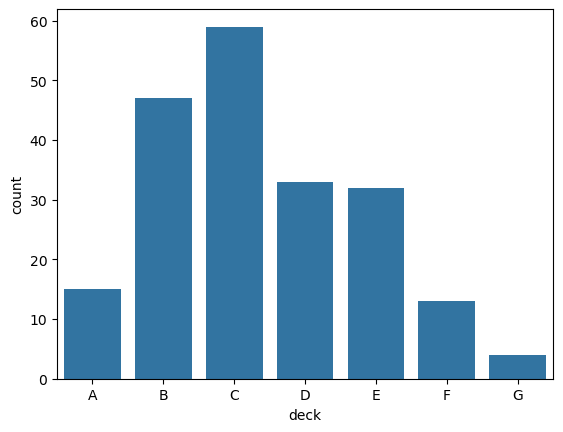

In [93]:
#Visualize non-empty numbers in deck using countplot in seaborn. Countplot is used to view category of a dataset
sns.countplot(x = 'deck', data = df)

<Axes: xlabel='deck', ylabel='count'>

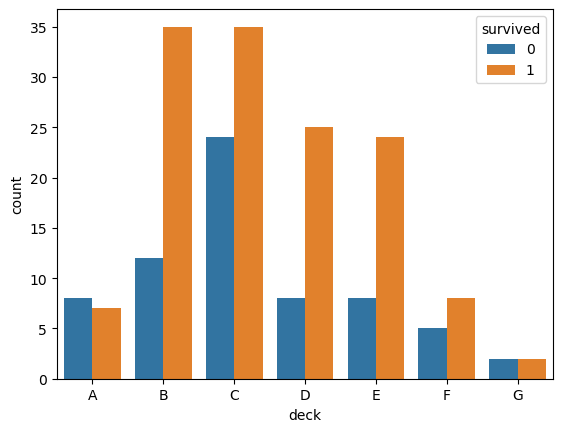

In [95]:
#Check this data with those who survived in each deck
sns.countplot(x='deck', hue = 'survived', data = df)

In [97]:
#We can't replace missing values in deck so it is better to drop it
df.drop(['deck'], axis = 1, inplace = True)

In [99]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,Southampton,True


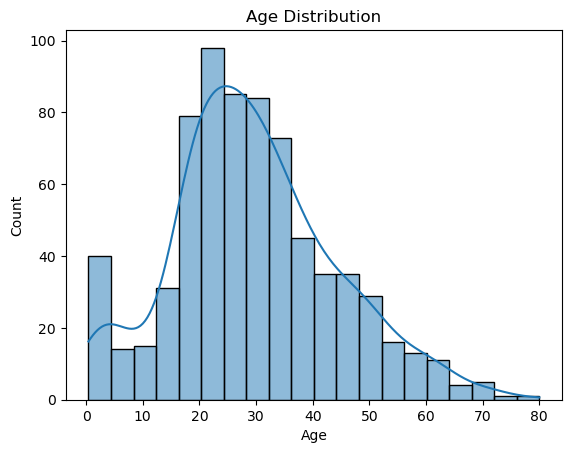

In [101]:
sns.histplot(x=df['age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()

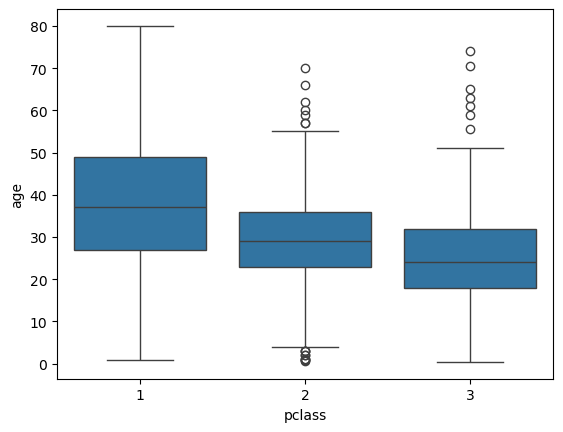

In [103]:
sns.boxplot(y=df['age'], x = df['pclass'], data = df, )
plt.show()
#from this graph, those with 1st class looks grown, then 2 and 3. 
#One can infer that as age decreases, class also decreases

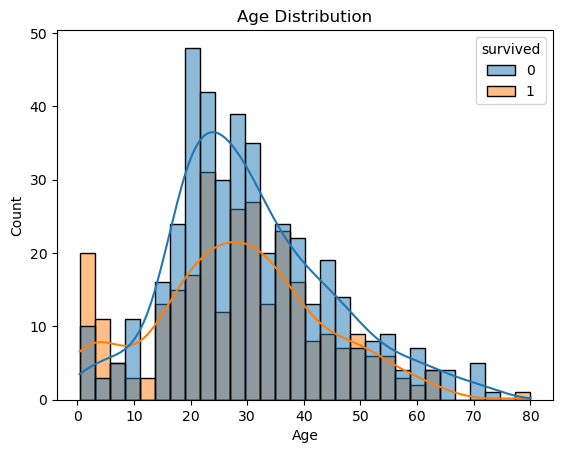

In [105]:
sns.histplot(x=df['age'], hue =df['survived'], bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()

In [107]:
def fillna_age(column):
    age = column[0]
    pclass = column[1]
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 28
        else:
            return 23
    else:
        return age
        

In [109]:
df.age = df[["age", "pclass"]].apply(fillna_age, axis = 1)

In [111]:
df["age"].isnull().sum()

0

In [113]:
df["age"].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

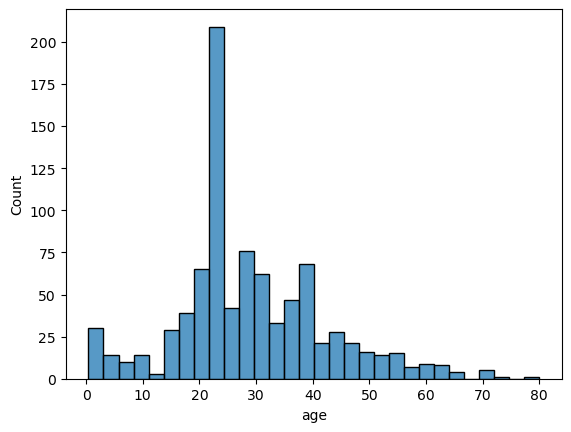

In [115]:
sns.histplot(x=df["age"], data=df, bins=30)

In [117]:
df["embark_town"].fillna(df["embark_town"].mode()[0], inplace=True)

In [119]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
who            0
adult_male     0
embark_town    0
alone          0
dtype: int64

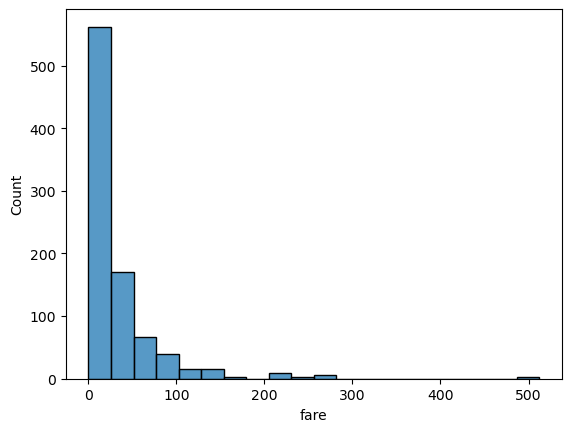

In [121]:
sns.histplot(x=df["fare"], bins=20)
plt.show()

<Axes: >

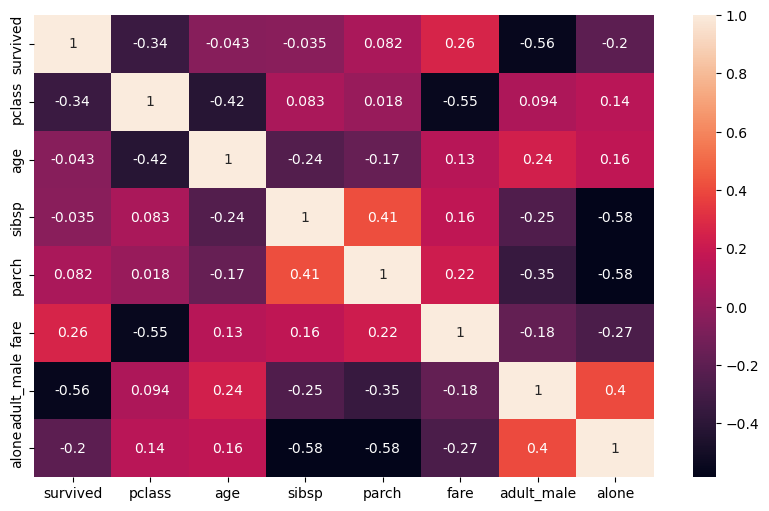

In [123]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [125]:
#From our analysis we can see that age, sibsp and parch do not significantly affect "Sruvived". Lets drop them
df.drop(["age", "sibsp", "parch"], axis = 1, inplace = True)

In [127]:
df.head()

,survived,pclass,sex,fare,who,adult_male,embark_town,alone
0,0,3,male,7.2500,man,True,Southampton,False
1,1,1,female,71.2833,woman,False,Cherbourg,False
2,1,3,female,7.9250,woman,False,Southampton,True
3,1,1,female,53.1000,woman,False,Southampton,False
4,0,3,male,8.0500,man,True,Southampton,True


In [129]:
sex = pd.get_dummies(df['sex'], drop_first=True)
who = pd.get_dummies(df['who'], drop_first=True)
adult_male = pd.get_dummies(df['adult_male'], drop_first=True).rename(columns={True: 'adult_male'})
embark_town = pd.get_dummies(df['embark_town'], drop_first=True)
alone = pd.get_dummies(df['alone'], drop_first=True).rename(columns={True: 'alone'})


In [131]:
df = pd.concat([df, sex, who, adult_male, embark_town, alone], axis = 1)

In [133]:
df.head()

,survived,pclass,sex,fare,who,adult_male,embark_town,alone,male,man,woman,adult_male,Queenstown,Southampton,alone
0,0,3,male,7.2500,man,True,Southampton,False,True,True,False,True,False,True,False
1,1,1,female,71.2833,woman,False,Cherbourg,False,False,False,True,False,False,False,False
2,1,3,female,7.9250,woman,False,Southampton,True,False,False,True,False,False,True,True
3,1,1,female,53.1000,woman,False,Southampton,False,False,False,True,False,False,True,False
4,0,3,male,8.0500,man,True,Southampton,True,True,True,False,True,False,True,True


In [135]:
df.drop(["sex", "who", "adult_male", "embark_town", "alone"], axis = 1, inplace = True)

In [137]:
df.head()

,survived,pclass,fare,male,man,woman,Queenstown,Southampton
0,0,3,7.2500,True,True,False,False,True
1,1,1,71.2833,False,False,True,False,False
2,1,3,7.9250,False,False,True,False,True
3,1,1,53.1000,False,False,True,False,True
4,0,3,8.0500,True,True,False,False,True


In [141]:
df = df.astype(int)

In [173]:
df.head()

,survived,pclass,fare,male,man,woman,Queenstown,Southampton
0,0,3,7,1,1,0,0,1
1,1,1,71,0,0,1,0,0
2,1,3,7,0,0,1,0,1
3,1,1,53,0,0,1,0,1
4,0,3,8,1,1,0,0,1


<Axes: >

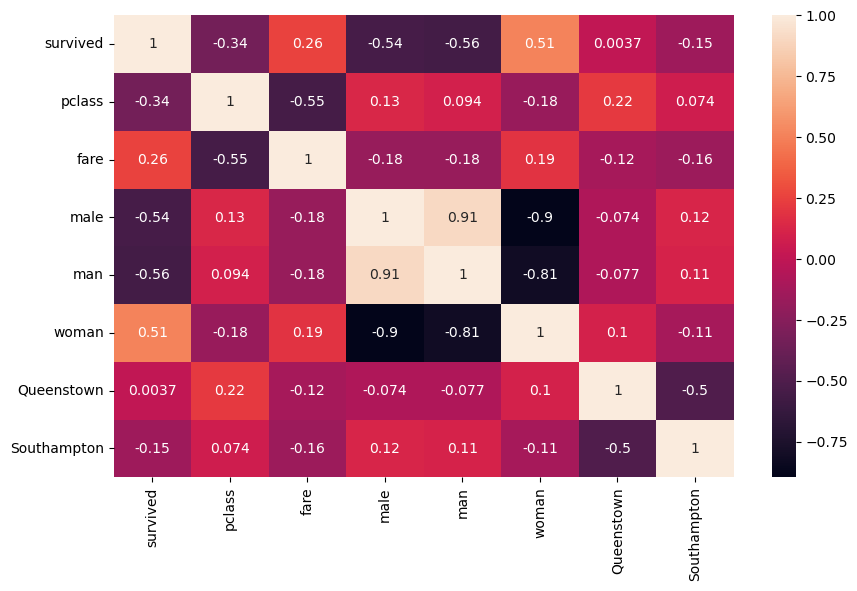

In [175]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True)

**Modelling**

In [177]:
from sklearn.model_selection import train_test_split

In [179]:
X = df.drop("survived", axis = 1)
y = df["survived"]

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [183]:
from sklearn.linear_model import LogisticRegression

In [185]:
log_model = LogisticRegression()

In [187]:
log_model.fit(X_train, y_train)


LogisticRegression()

In [189]:
y_pred = log_model.predict(X_test)

In [191]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [193]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       134
           1       0.70      0.75      0.72        89

    accuracy                           0.77       223
   macro avg       0.76      0.77      0.76       223
weighted avg       0.78      0.77      0.77       223



In [195]:
confusion_matrix(y_test, y_pred)

array([[105,  29],
       [ 22,  67]])

In [197]:
#Trying one from Titanic
import pandas as pd

# Sample passenger (William Henry Allen)
sample_data = pd.DataFrame([{
    'pclass': 3,
    'fare': 8.05,
    'male': 1,
    'man': 1,
    'woman': 0,
    'Queenstown': 0,
    'Southampton': 1
}])

# Make prediction
prediction = log_model.predict(sample_data)
print("Prediction:", prediction[0])  # 0 = Died, 1 = Survived


Prediction: 0
